In [1]:
%matplotlib notebook

import pandas as pd
import math
import cartopy.crs as ccrs
import matplotlib.pyplot as plt



In [2]:
from tqdm import tqdm
# The Nominatim geocoder seems to use openstreetmap.com...
from geopy.geocoders import Nominatim


def get_locations(address, zip_code):
    try:
        # This removes information about a flats storey
        address_field = address.split(', ')[0]
        # This one removes trailing letters on the city name
        # It seems as if Openstreetmap cannot handle København H
        # but it works with København
        zip_field = ' '.join(zip_code.split(' ')[:-1])
        search_address = ', '.join([address_field, zip_field])

        geolocator = Nominatim()
        location = geolocator.geocode(search_address)
        return location.latitude, location.longitude
    except:
        print('Skipped geocoding of {} {}'.format(address, zip_code))
        return None, None

In [3]:
def haversine_distance(origin, destination):

    lat_orig, lon_orig = origin
    lat_dest, lon_dest = destination
    radius = 6371

    dlat = math.radians(lat_dest-lat_orig)
    dlon = math.radians(lon_dest-lon_orig)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat_orig)) 
        * math.cos(math.radians(lat_dest)) * math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [4]:
hoousing = "boliga_all.csv"
df = pd.read_csv(hoousing)
#Format date before displaying
df['sell_year'] = [int(el.split('-')[-1]) for el in df['sell_date'].values]
#find a clean sheet
# I will be dispalying 15 rows from now on
records_for_2015 = (df['sell_year'] == 2017 ) 
df_2015 = df[records_for_2015]
mini_df = df_2015[['address', 'zip_code','sell_year']][:15]


In [5]:
locs = []
#for _, el in df_bolig_zealand[['address', 'zip_code']][:15].iterrows():
for _, el in mini_df[['address', 'zip_code']][:15].iterrows():
    locs.append(get_locations(el['address'], el['zip_code']))


/home/vagrant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


In [6]:
locs
mini_df  = mini_df.join(pd.DataFrame(locs, columns=['lat', 'lon']))
mini_df 


,address,zip_code,sell_year,lat,lon
0,"Ved Volden 5, 5. TV",1425 København K,2017,55.671769,12.593629
1,"Rådhusstræde 4C, 1",1466 København K,2017,55.676839,12.573689
2,"Store Kongensgade 112A, 3",1264 København K,2017,55.687079,12.590441
3,"Amaliegade 13G, 2",1256 København K,2017,55.683439,12.591287
4,"Borgergade 144, 3. TH",1300 København K,2017,55.687623,12.588744
5,"Nørre Søgade 9A, 1. TH",1370 København K,2017,55.685009,12.564482
6,"Wildersgade 22, ST",1408 København K,2017,55.672780,12.589600
7,"Toldbodgade 10A, 1",1253 København K,2017,55.680333,12.592053
8,"Andreas Bjørns Gade 4, 3. TH",1428 København K,2017,55.675411,12.597484
9,"Sølvgade 15, 4. TH",1307 København K,2017,55.685614,12.584512


### 1. Create a plot with the help of Basemap, on which you plot sales records for 2015  which are not farther away than 50km from Copenhagen city center (lat: 55.676111, lon: 12.568333)  

In [7]:
# In order to calculate,N.B I could not get lat and lon of 2015 from my file
# NOTICE
# mini_df is from 2017
mini_df['distance_from_city_center'] = mini_df.apply(lambda row : haversine_distance((row['lat'],row['lon']),(55.676111, 12.568333)), axis=1)
mini_df.head()

,address,zip_code,sell_year,lat,lon,distance_from_city_center
0,"Ved Volden 5, 5. TV",1425 København K,2017,55.671769,12.593629,1.657990
1,"Rådhusstræde 4C, 1",1466 København K,2017,55.676839,12.573689,0.345434
2,"Store Kongensgade 112A, 3",1264 København K,2017,55.687079,12.590441,1.846157
3,"Amaliegade 13G, 2",1256 København K,2017,55.683439,12.591287,1.653748
4,"Borgergade 144, 3. TH",1300 København K,2017,55.687623,12.588744,1.809944


In [8]:
distance_lesser_than_50 = (mini_df.distance_from_city_center <= 50)
distance_away = mini_df[distance_lesser_than_50]
distance_away.head()

,address,zip_code,sell_year,lat,lon,distance_from_city_center
0,"Ved Volden 5, 5. TV",1425 København K,2017,55.671769,12.593629,1.657990
1,"Rådhusstræde 4C, 1",1466 København K,2017,55.676839,12.573689,0.345434
2,"Store Kongensgade 112A, 3",1264 København K,2017,55.687079,12.590441,1.846157
3,"Amaliegade 13G, 2",1256 København K,2017,55.683439,12.591287,1.653748
4,"Borgergade 144, 3. TH",1300 København K,2017,55.687623,12.588744,1.809944


<IPython.core.display.Javascript object>


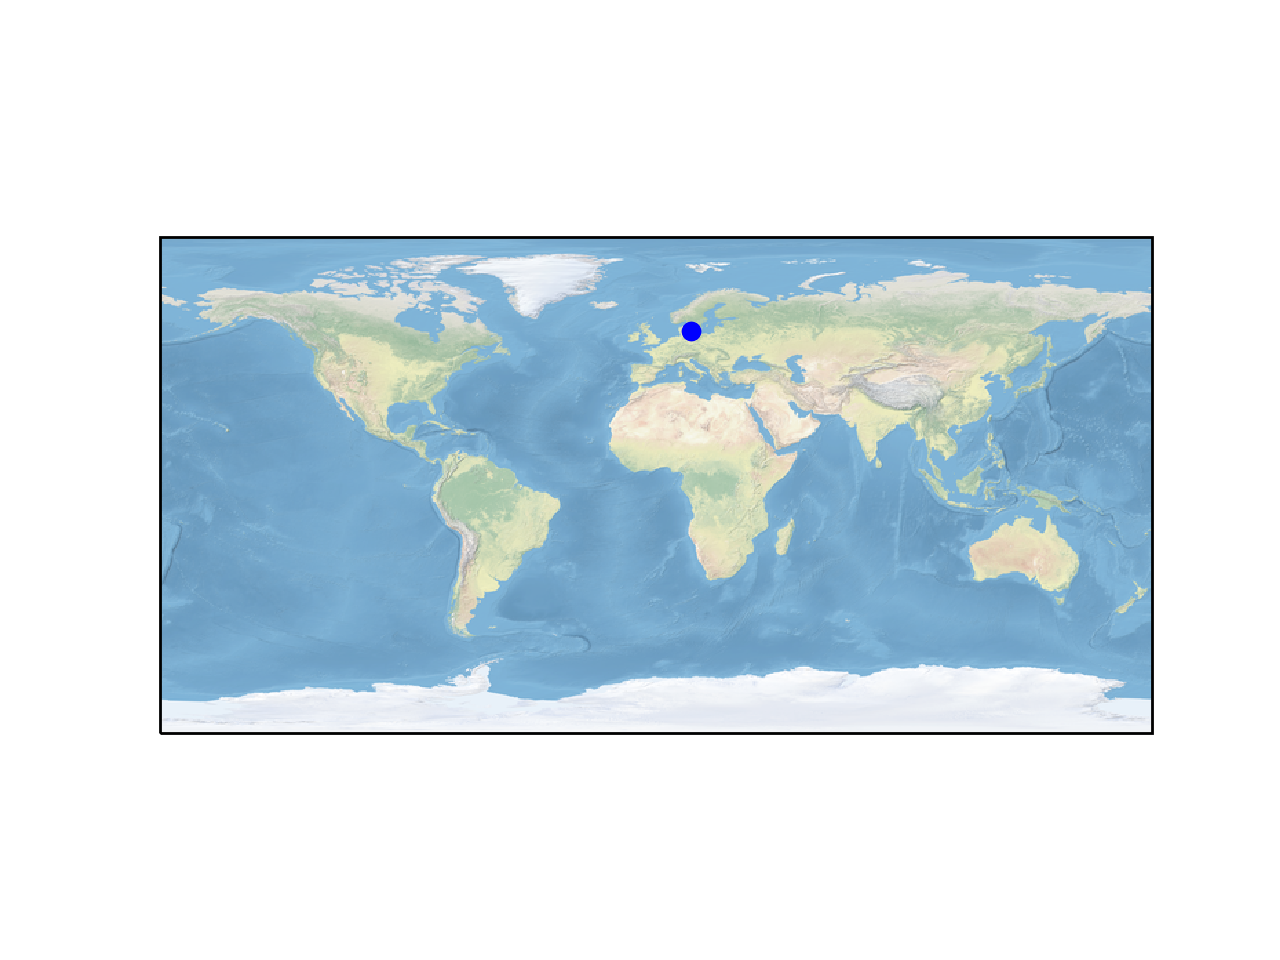

In [9]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ny_lon, ny_lat = 12.593629, 55.671769
city_lon, city_lat =  12.568333, 55.676111

plt.plot([ny_lon, city_lon], [ny_lat, city_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )


plt.show()

In [10]:
#2. Use `folium` to plot the locations of the 1992 housing sales
#for the city centers of Copenhagen (zip code 1000-1499), 
#Odense (zip code 5000), Aarhus (zip code 8000), and Aalborg (zip code 9000), 
# see Assignment 2 onto a map. 
 
import folium
from IPython.display import IFrame

In [11]:
df['zip_code'] = [(el.split(' ')[0]) for el in df['zip_code'].values]
#df = df.drop(df[['longitude','latitude']], axis=1) 
df


,address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct,sell_year
0,"Ved Volden 5, 5. TV",1425,4000000,23-05-2017,Alm. Salg,43956.0,3.0,Lejlighed,91.0,1938.0,0.0,2017
1,"Rådhusstræde 4C, 1",1466,4895000,18-05-2017,Alm. Salg,46619.0,3.0,Lejlighed,105.0,1796.0,0.0,2017
2,"Store Kongensgade 112A, 3",1264,250000,15-05-2017,Andet,1851.0,2.0,Lejlighed,135.0,1860.0,0.0,2017
3,"Amaliegade 13G, 2",1256,7375000,15-05-2017,Alm. Salg,75255.0,3.0,Lejlighed,98.0,1948.0,9.0,2017
4,"Borgergade 144, 3. TH",1300,5825000,10-05-2017,Alm. Salg,57673.0,3.0,Lejlighed,101.0,1854.0,3.0,2017
5,"Nørre Søgade 9A, 1. TH",1370,1126250,10-05-2017,Fam. Salg,10525.0,3.0,Lejlighed,107.0,1882.0,0.0,2017
6,"Wildersgade 22, ST",1408,1556700,09-05-2017,Alm. Salg,17689.0,3.0,Lejlighed,88.0,1858.0,0.0,2017
7,"Toldbodgade 10A, 1",1253,3750000,08-05-2017,Fam. Salg,20380.0,5.0,Lejlighed,184.0,1862.0,0.0,2017
8,"Andreas Bjørns Gade 4, 3. TH",1428,1700000,05-05-2017,Alm. Salg,31481.0,2.0,Lejlighed,54.0,1901.0,0.0,2017
9,"Sølvgade 15, 4. TH",1307,4215000,04-05-2017,Alm. Salg,52037.0,3.0,Lejlighed,81.0,1957.0,-2.0,2017


In [12]:
mask_1992= (df['sell_year'] == 1992) &   df['zip_code'].isin(['1000','1300', 
                            '1256','5000',
                            '8000','9000'])


In [13]:
df_1992 = df[mask_1992]
df_1992

,address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct,sell_year
6223,"Borgergade 26, 4. 6",1300,310000,29-04-1992,Alm. Salg,7045.0,1.0,Lejlighed,44.0,1974.0,0.0,1992
645404,Windelsvej 28,5000,360000,04-12-1992,Alm. Salg,NaN,4.0,Villa,95.0,1924.0,0.0,1992
645405,Bøgebjergvej 12,5000,655000,27-11-1992,Alm. Salg,5413.0,4.0,Villa,121.0,1934.0,0.0,1992
645406,Windelsvej 37,5000,640000,25-11-1992,Alm. Salg,4324.0,6.0,Villa,148.0,1935.0,0.0,1992
645407,Drejøgade 21,5000,575000,24-11-1992,Alm. Salg,7012.0,3.0,Villa,82.0,1938.0,0.0,1992
645408,Vendersvej 29,5000,350000,14-11-1992,Alm. Salg,4545.0,4.0,Villa,77.0,1948.0,0.0,1992
645409,Bøgebjergvej 5,5000,376250,11-11-1992,Fam. Salg,2894.0,6.0,Villa,130.0,1923.0,0.0,1992
645410,Dronningensgade 6B,5000,560000,07-11-1992,Alm. Salg,6363.0,3.0,Lejlighed,88.0,1884.0,0.0,1992
645411,Isgårdsvej 19,5000,380000,04-11-1992,Alm. Salg,4086.0,4.0,Villa,93.0,1963.0,0.0,1992
645412,Ny Kongevej 24,5000,375000,29-10-1992,Alm. Salg,2737.0,7.0,Villa,137.0,1927.0,0.0,1992


In [14]:
data_df = mini_df[['address', 'zip_code','lat','lon']]

# Make an empty map
m = folium.Map(location=[55.88207495748612, 10.636574309440173], tiles="Mapbox Bright", zoom_start=2)

# I can add marker one by one on the map
for i in range(0,len(data_df)):
    folium.Marker([data_df.iloc[i]['lon'], data_df.iloc[i]['lat']], popup=data_df.iloc[i]['address']).add_to(m)


m.save('312_markers_on_folium_map1.html')



In [15]:
IFrame(src='312_markers_on_folium_map1.html', width=700, height=600)

In [27]:
# 3. Create a 2D plot, 
#which compares prices per square meter (on the x-axis)
#and distance to NÃ¸rreport st. (y-axis) for all housing on SjÃ¦land for 
#the year 2005 and where the zip code is lower than 3000 and the 
#price per square meter is _lower_ than 80000Dkk. Describe in words 
#what you can read out of the plot. 
#Formulate a hypothesis on how the values on the two axis might be related.
mask_2005=( (df['sell_year'] == 2005) &          
     (df['price_per_sq_m'] < 80000))

df['zip_code'] = pd.to_numeric(df['zip_code'])
df_ = mask_2005 & (df['zip_code'] < 3000)

df_2005 = df[df_]
df_2005

,address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct,sell_year
4608,"Lille Strandstræde 20, 2. TV",1254,7500000,29-12-2005,Alm. Salg,29527.0,7.0,Lejlighed,254.0,1778.0,0.0,2005
4609,"Wildersgade 2A, ST. TV",1408,3595000,27-12-2005,Alm. Salg,34902.0,3.0,Lejlighed,103.0,2001.0,0.0,2005
4610,"Hammershøis Kaj 10, 5. TV",1402,4900000,25-12-2005,Alm. Salg,41176.0,4.0,Lejlighed,119.0,2003.0,0.0,2005
4611,"Store Kongensgade 92B, 5",1264,4200000,24-12-2005,Alm. Salg,42000.0,2.0,Lejlighed,100.0,1865.0,0.0,2005
4612,"Amaliegade 13B, 6. TH",1256,6000000,23-12-2005,Alm. Salg,43165.0,3.0,Lejlighed,139.0,1962.0,0.0,2005
4613,"Lille Strandstræde 12A, 2",1254,2800000,21-12-2005,Alm. Salg,51851.0,1.0,Lejlighed,54.0,1778.0,0.0,2005
4614,"Ved Volden 9, 3. TH",1425,1821126,20-12-2005,Fam. Salg,19373.0,4.0,Lejlighed,94.0,1938.0,0.0,2005
4615,"Ny Østergade 20, 3. 3",1101,3500000,19-12-2005,Alm. Salg,30172.0,3.0,Lejlighed,116.0,1978.0,0.0,2005
4616,"Johan Semps Gade 1, 3. TH",1402,5520000,19-12-2005,Alm. Salg,40588.0,3.0,Lejlighed,136.0,2002.0,0.0,2005
4617,"Sankt Pauls Gade 12, 4",1313,4125000,17-12-2005,Alm. Salg,31730.0,4.0,Lejlighed,130.0,1854.0,0.0,2005


In [28]:
#df_2005['distance_norreport'] = df_2005.apply(lambda x : haversine_distance((x['lat'],x['lon']),(55.683010, 12.571143)), axis=1)

%matplotlib inline
fig = plt.figure(figsize=(5, 4))
plt.scatter(df_2005.price_per_sq_m,df_2005.dist_norre)
fig.savefig('2d-plot.png')

<IPython.core.display.Javascript object>


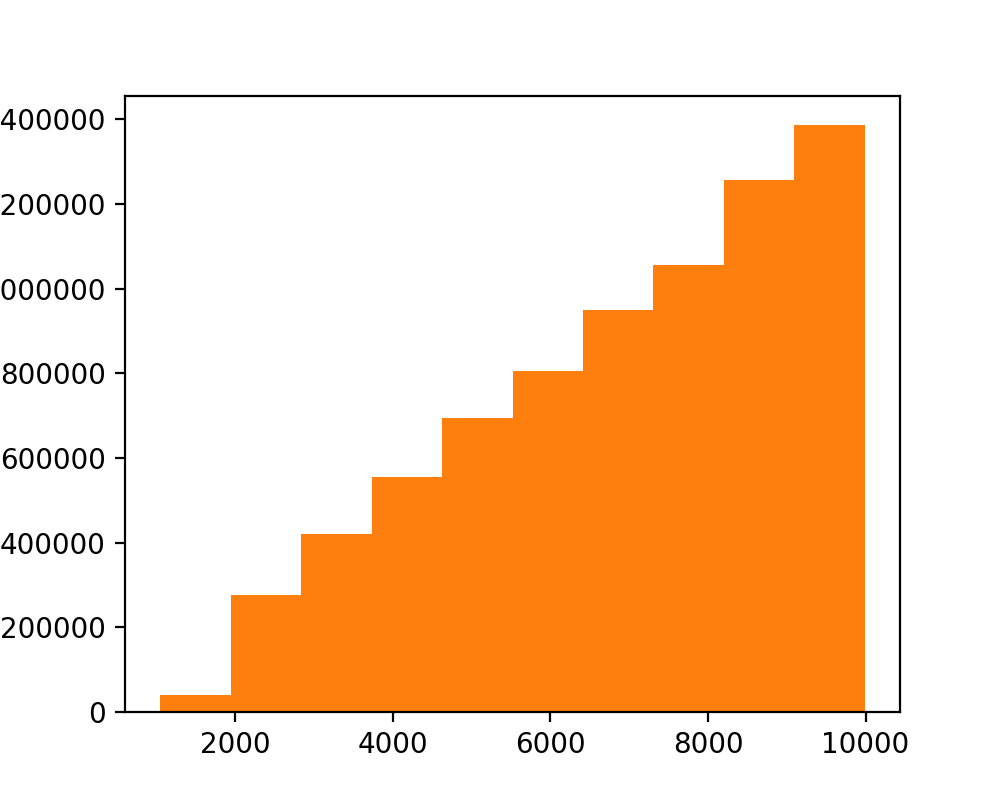

In [30]:
# 4. Create a histogram (bar plot), which visualizes the frequency of 
#house trades per zip code area corresponding to the entire dataset of housing sale records.
fig = plt.figure(figsize=(5, 4))
plt.hist(df['zip_code'], bins=10)
fig.savefig('histogram.png')

In [31]:
# 5. Create a cumulatve histogram, which visualizes the frequency of house trades per zip code area corresponding to the entire dataset of housing sale records and the vertical bars are colored to the frequency of rooms per sales record. That is, a plot similar to the following, where single rooms are in the bottom and two room frequencies on top, etc. See, **http://matplotlib.org/1.3.0/examples/pylab\_examples/histogram\_demo\_extended.html** for example.

 # ![](http://matplotlib.org/1.3.0/mpl_examples/pylab_examples/histogram_demo_extended_04.png)

plt.hist(df.zip_code, cumulative=True)


(array([   39221.,   275491.,   419558.,   554049.,   694250.,   804955.,
          948702.,  1054861.,  1255377.,  1385309.]),
 array([ 1050.,  1944.,  2838.,  3732.,  4626.,  5520.,  6414.,  7308.,
         8202.,  9096.,  9990.]),
 <a list of 10 Patch objects>)

In [ ]:
 # 6. Now, you create a 3D histogram, in which you plot the frequency of house trades per zip code area as a 'layer' for every in the dataset, see **http://matplotlib.org/examples/mplot3d/index.html** for an example.

  #![](https://matplotlib.org/_images/bars3d_demo1.png)
  
  

In [ ]:
#7. **Freestyle** Create a plot, which visualizes a fact hidden in the housing sales data, which you want to highlight to business people.


